In [1]:
! pip install tensorflow-probability
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import tensorflow as tf
import tensorflow_probability as tfp
import PIL

You should consider upgrading via the 'c:\python37\python.exe -m pip install --upgrade pip' command.


  Using cached dm_tree-0.1.6-cp37-cp37m-win_amd64.whl (75 kB)


In [2]:
(train_images, _), (test_images, _) = tf.keras.datasets.mnist.load_data() 

In [3]:
train_images.shape, test_images.shape

((60000, 28, 28), (10000, 28, 28))

In [5]:
def preprocess_images(image):
    image = image.reshape(image.shape[0], 28, 28, 1)
    return np.where(image > 0.5, 1.0, 0.0).astype("float32")

train_images = preprocess_images(train_images)
test_images = preprocess_images(test_images)
    

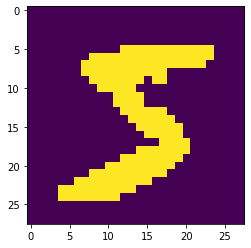

In [6]:
plt.imshow(train_images[0])

In [7]:
train_size = 60000
test_size = 10000
batch_size = 32

In [8]:
train_dataset = tf.data.Dataset.from_tensor_slices(train_images).shuffle(train_size).batch(batch_size)
test_dataset = tf.data.Dataset.from_tensor_slices(test_images).shuffle(test_size).batch(batch_size)

In [9]:
class CVAE(tf.keras.Model):
    def __init__(self, latent_dim):
        super().__init__()
        self.laten_dim = laten_dim
        self.encoder = tf.keras.Sequential([
            tf.keras.layer.InputLayer(input_shape=(28, 28, 1)),
            tf.keras.layers.Conv2D(filters=32, kernel_size=3, strides=(2,2), activation="relu"),
            tf.keras.layers.Conv2D(filters=64, kenrel_size=3, strides=(2,2), activation="relu"),
            tf.keras.layers.Flatten(),
            tf.keras.layers.Dense(laten_dim + laten_dim)
        ])
        
        self.decoder = tf.keras.Sequential([
            tf.keras.layers.InputLayer(input_shape=(laten_dim)),
            tf.keras.layers.Dense(7*7*32, activation="relu"),
            tf.keras.layers.Reshape(target_shape=(7, 7, 32)), 
            tf.keras.layers.Conv2DTranspose(filters=64, kernel_size=3, strides=2, padding="same", activation="relu"),
            tf.keras.layers.Conv2DTranspose(filters=32, kernel_size=3, strides=2, padding="same", activation="relu"),
            tf.keras.layers.Conv2DTranspose(filters=1, kernel_size=3, strides=1, padding="same")
        ])
        
@tf.function
def sample(self, eps=None):
    if eps is None:
        eps = tf.random.normal(shape=(100, self.laten_dim))
    return self.decode(eps, apply_sigmoid=True)
def encode(self, x):
    mean, logvar = tf.split(self.encoder(x), num_or_size_splits=2, axis=1)
    return mean, logvar
def reparameterize(self, mean, logvar):
    eps = tf.random.normal(shape=mean.shape)
    return eps * tf.exp(logvar * 0.5) + mean
def decode(self, z, apply_sigmoid=False):
    logits = self.decoder(z)
    if apply_sigmoid:
        probs = tf.sigmoid(logits)
        return probs
    return logits
    


In [ ]:
optimizer = tf.keras.optimizers.Adam(1e-4)

def log_normal_pdf(sample, mean, logvar, raxis=1):
    log2pi = tf.math.log(2. * np.pi)
    return tf.reduce_sum(-0.5 * (sample - mean) **2 * tf.exp(-logvar) + logvar +log2pi), aixs=raxis)

